# Stroke Classification Prediction
## Link Dataset = https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

## Load Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.model_selection import GridSearchCV
import numpy as np
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

## Data Understanding

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
object_cols = list(df.select_dtypes(exclude='number').columns)
num_cols = list(df.select_dtypes(include="number").columns)

In [ ]:
df[object_cols].head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [ ]:
df[num_cols].head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1


In [ ]:
df[num_cols].describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df[object_cols].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [ ]:
print(len(num_cols))
print(len(object_cols))

7
5


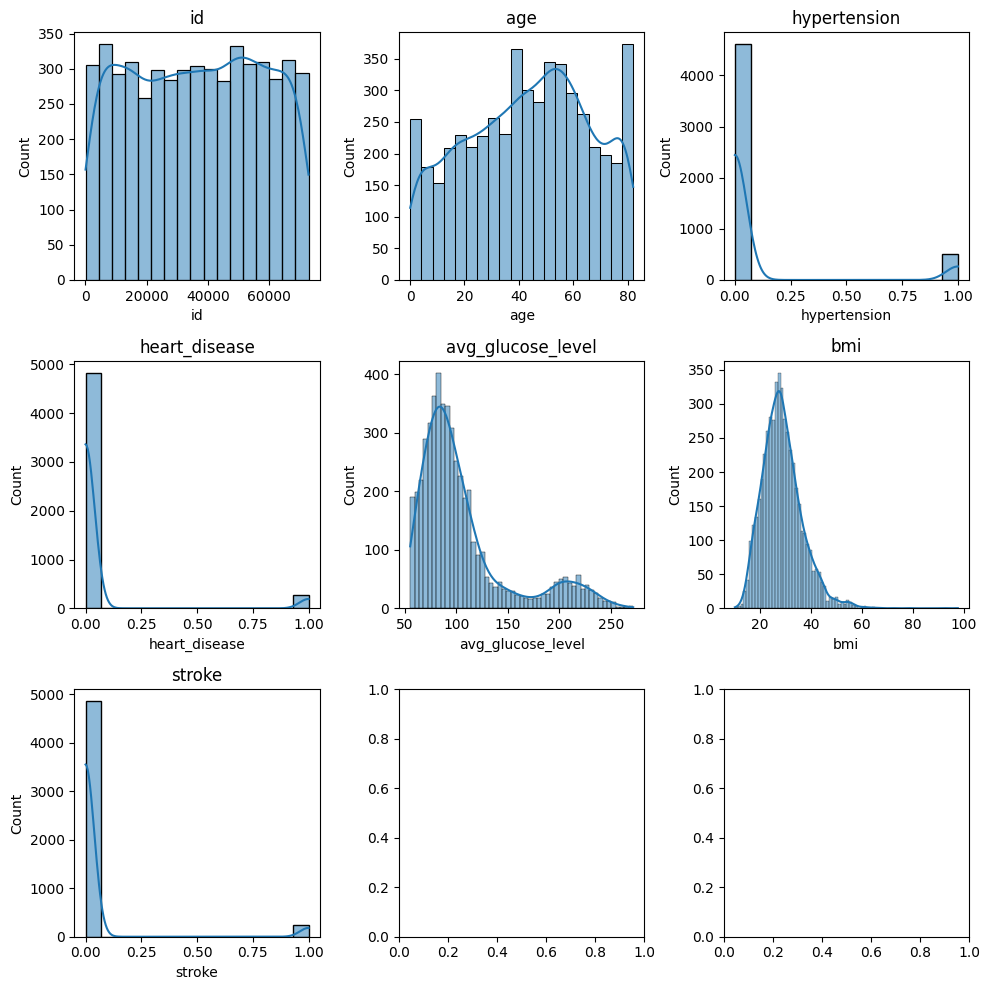

In [ ]:
fig, ax = plt.subplots(3 , 3,figsize=(10,10))
ax = ax.flatten()
for idx, col in enumerate(num_cols):
  sns.histplot(df[col], kde=True, ax=ax[idx])
  ax[idx].set_title(col)
plt.tight_layout()
plt.show()

## Data Preprocessing

### Missing Value

In [ ]:
df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


<Axes: xlabel='bmi', ylabel='Count'>

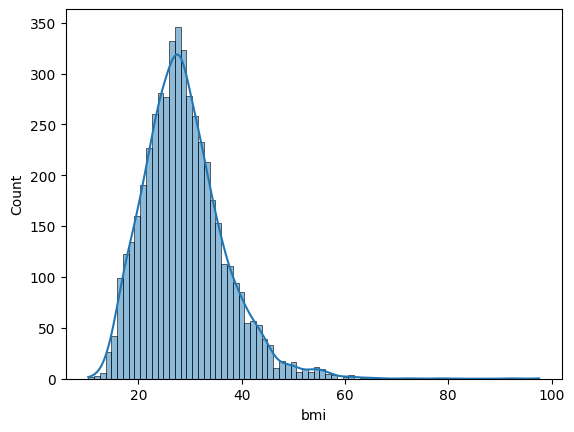

In [ ]:
sns.histplot(df['bmi'], kde=True)

The distribution looks normal, therefore we fill missing value with mean

In [ ]:
df["bmi"].fillna(df["bmi"].mean(), inplace=True)

/tmp/ipython-input-2646885692.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bmi"].fillna(df["bmi"].mean(), inplace=True)


In [ ]:
df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


### Dupliace Data

In [ ]:
df.duplicated().sum()

np.int64(0)

### Outlier Analyzing & Handling

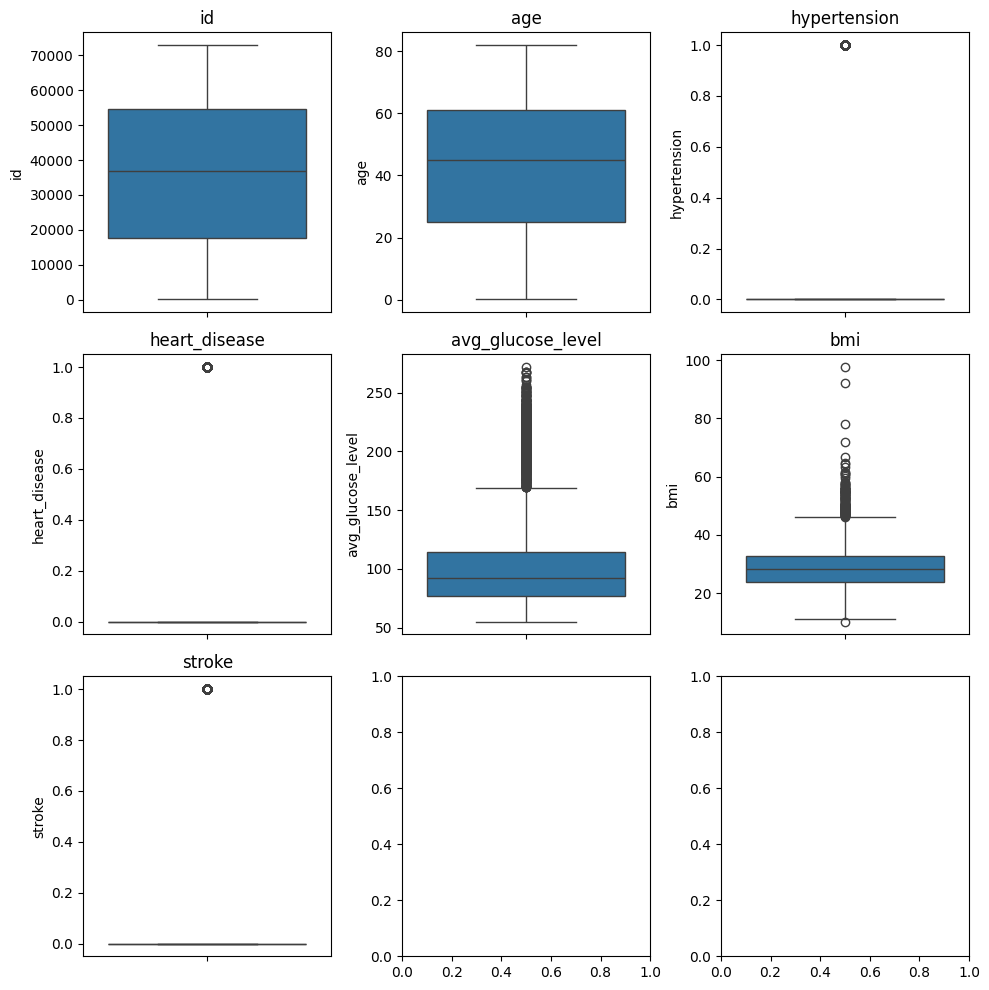

In [ ]:
fig, ax = plt.subplots(3 , 3,figsize=(10,10))
ax = ax.flatten()
for idx, col in enumerate(num_cols):
  sns.boxplot(df[col], ax=ax[idx])
  ax[idx].set_title(col)
plt.tight_layout()
plt.show()

In [ ]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data < lower_bound) | (data > upper_bound)]

    return outliers

In [ ]:
print("Outlier on avg_glucose_level: ", detect_outliers_iqr(df["avg_glucose_level"]).shape[0])
print("Outlier on bmi: ", detect_outliers_iqr(df["bmi"]).shape[0])

Outlier on avg_glucose_level:  627
Outlier on bmi:  126


#### Log Transformation

In [ ]:
log_glucose = np.log(df["avg_glucose_level"] + 1)
log_bmi = np.log(df["bmi"] + 1)

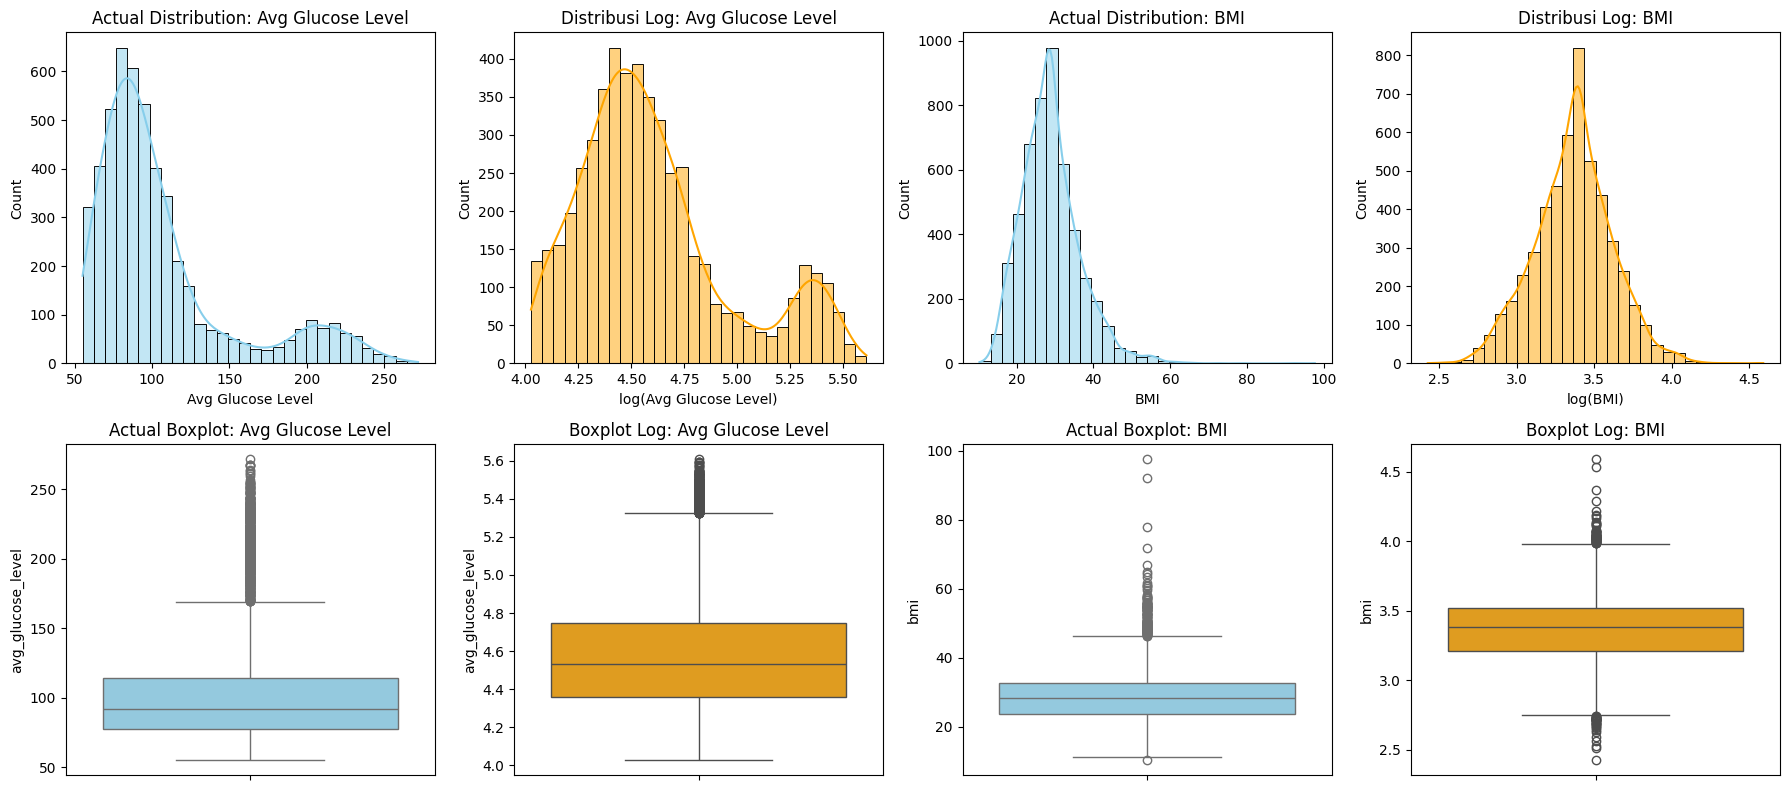

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(18, 8))
ax = ax.flatten()

cols = [
    ("avg_glucose_level", log_glucose, "Avg Glucose Level"),
    ("bmi", log_bmi, "BMI")
]

for i, (orig_col, log_var, label) in enumerate(cols):
    sns.histplot(df[orig_col], bins=30, ax=ax[i*2], kde=True, color="skyblue")
    ax[i*2].set_title(f"Actual Distribution: {label}")
    ax[i*2].set_xlabel(label)

    sns.histplot(log_var, bins=30, ax=ax[i*2 + 1], kde=True, color="orange")
    ax[i*2 + 1].set_title(f"Distribusi Log: {label}")
    ax[i*2 + 1].set_xlabel(f"log({label})")

    sns.boxplot(y=df[orig_col], ax=ax[4 + i*2], color="skyblue")
    ax[4 + i*2].set_title(f"Actual Boxplot: {label}")

    sns.boxplot(y=log_var, ax=ax[4 + i*2 + 1], color="orange")
    ax[4 + i*2 + 1].set_title(f"Boxplot Log: {label}")

plt.tight_layout()
plt.show()

In [ ]:
print("Outlier on avg_glucose_level: ", detect_outliers_iqr(log_glucose).shape[0])
print("Outlier on avg_glucose_level: ", detect_outliers_iqr(log_bmi).shape[0])

Outlier on avg_glucose_level:  384
Outlier on avg_glucose_level:  88


without removing any data points , log transform reduce up to 50% of outlier, we'll use this , in this case

In [ ]:
df["bmi"] = log_bmi
df["avg_glucose_level"] = log_glucose

### Categorical Encoding

In [ ]:
for col in object_cols:
  print(df[col].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [ ]:
df = pd.get_dummies(df, columns=object_cols, drop_first=True, dtype=int)

In [ ]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,5.436731,3.627004,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,5.314240,3.397632,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,4.672081,3.511545,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,5.148831,3.566712,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,5.165471,3.218876,1,0,0,1,0,0,1,0,0,0,1,0


### Numerical Scalling

In [ ]:
cols_to_scale = ["bmi", "avg_glucose_level", "age"]
sc = StandardScaler()
df[cols_to_scale] = sc.fit_transform(df[cols_to_scale])

In [ ]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1.051434,0,1,2.324024,1.041161,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,0.786070,0,0,1.982522,0.125743,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,1.626390,0,1,0.192196,0.580368,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,0.255342,0,0,1.521365,0.800536,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,1.582163,1,0,1.567759,-0.587671,1,0,0,1,0,0,1,0,0,0,1,0


### Drop Unnecessary Column

In [ ]:
df.drop("id", axis=1,inplace=True)

In [ ]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051434,0,1,2.324024,1.041161,1,1,0,1,0,1,0,0,1,1,0,0
1,0.786070,0,0,1.982522,0.125743,1,0,0,1,0,0,1,0,0,0,1,0
2,1.626390,0,1,0.192196,0.580368,1,1,0,1,0,1,0,0,0,0,1,0
3,0.255342,0,0,1.521365,0.800536,1,0,0,1,0,1,0,0,1,0,0,1
4,1.582163,1,0,1.567759,-0.587671,1,0,0,1,0,0,1,0,0,0,1,0


### Data Splitting (Train, val, test)

In [ ]:
X = df.drop("stroke", axis=1)
y = df["stroke"]

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42
)

### Handling Imbalanced

In [ ]:
y_train.value_counts()

,count
stroke,
0,2923
1,143


Use Undersampling + Oversampling with SMOTETomek

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
y_resampled.value_counts()

,count
stroke,
0,2923
1,2923


In [ ]:
X_resampled.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.007207,0,0,0.107749,0.867613,0,0,1,0,0,1,0,1,1,0,0
1,0.874525,0,0,-1.105469,1.948669,1,0,1,0,0,0,0,1,0,1,0
2,0.034205,0,0,-0.405779,-0.251067,0,0,1,0,0,0,0,1,0,0,0
3,0.166887,0,0,0.325339,-0.619727,1,0,0,0,1,0,0,0,0,1,0
4,-0.186932,0,0,1.650267,-0.036830,1,0,1,0,1,0,0,1,0,0,0


In [ ]:
df_balanced = pd.concat([X_resampled, y_resampled], axis=1)

In [ ]:
X_train_balanced = df_balanced.drop("stroke", axis=1)
y_train_balanced = df_balanced["stroke"]

## Modelling

### Logistic Regression

In [ ]:
lr_model_balanced = LogisticRegression(C=0.01, random_state=42, class_weight="balanced")
lr_model_balanced.fit(X_train_balanced , y_train_balanced)

LogisticRegression(C=0.01, class_weight='balanced', random_state=42)

In [ ]:
y_pred = lr_model_balanced.predict(X_val)
print("Accuracy score" , accuracy_score(y_val, y_pred))
print("F1 score" , f1_score(y_val, y_pred))
print(classification_report(y_val, y_pred))
print("Recall", recall_score(y_val, y_pred))

Accuracy score 0.7583170254403131
F1 score 0.2108626198083067
              precision    recall  f1-score   support

           0       0.99      0.76      0.86       978
           1       0.12      0.75      0.21        44

    accuracy                           0.76      1022
   macro avg       0.55      0.75      0.53      1022
weighted avg       0.95      0.76      0.83      1022

Recall 0.75


In [ ]:
lr_model = LogisticRegression(C=0.01, random_state=42, class_weight="balanced")
lr_model.fit(X_train , y_train)

LogisticRegression(C=0.01, class_weight='balanced', random_state=42)

In [ ]:
y_pred = lr_model.predict(X_val)
print("Accuracy score" , accuracy_score(y_val, y_pred))
print("F1 score" , f1_score(y_val, y_pred))
print(classification_report(y_val, y_pred))
print("Recall", recall_score(y_val, y_pred))

Accuracy score 0.7279843444227005
F1 score 0.2057142857142857
              precision    recall  f1-score   support

           0       0.99      0.72      0.84       978
           1       0.12      0.82      0.21        44

    accuracy                           0.73      1022
   macro avg       0.55      0.77      0.52      1022
weighted avg       0.95      0.73      0.81      1022

Recall 0.8181818181818182


### Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=2, class_weight="balanced")
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=2)

In [ ]:
y_pred = rf_model.predict(X_val)
print("Accuracy score" , accuracy_score(y_val, y_pred))
print("F1 score" , f1_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy score 0.9549902152641878
F1 score 0.0
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       978
           1       0.00      0.00      0.00        44

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.92      0.95      0.93      1022



In [ ]:
rf_model = RandomForestClassifier(random_state=2, class_weight="balanced")
rf_model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(class_weight='balanced', random_state=2)

In [ ]:
y_pred = rf_model.predict(X_val)
print("Accuracy score" , accuracy_score(y_val, y_pred))
print("F1 score" , f1_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy score 0.8904109589041096
F1 score 0.1111111111111111
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       978
           1       0.09      0.16      0.11        44

    accuracy                           0.89      1022
   macro avg       0.52      0.54      0.53      1022
weighted avg       0.92      0.89      0.91      1022



### Simple ANN

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(10, 2),
                    solver='lbfgs',
                    alpha=1e-5,
                    random_state=1,
                    max_iter=1000)

clf.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 2), max_iter=1000,
              random_state=1, solver='lbfgs')

In [ ]:
y_pred = clf.predict(X_val)
print("Accuracy score" , accuracy_score(y_val, y_pred))
print("F1 score" , f1_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy score 0.9324853228962818
F1 score 0.12658227848101267
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       978
           1       0.14      0.11      0.13        44

    accuracy                           0.93      1022
   macro avg       0.55      0.54      0.55      1022
weighted avg       0.93      0.93      0.93      1022



In [ ]:
clf_balanced = MLPClassifier(hidden_layer_sizes=(10, 2),
                    solver='lbfgs',
                    alpha=1e-5,
                    random_state=1,
                    max_iter=1000,
                  )

clf_balanced.fit(X_train_balanced, y_train_balanced)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 2), max_iter=1000,
              random_state=1, solver='lbfgs')

In [ ]:
y_pred = clf_balanced.predict(X_val)
print("Accuracy score" , accuracy_score(y_val, y_pred))
print("F1 score" , f1_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy score 0.8062622309197651
F1 score 0.1951219512195122
              precision    recall  f1-score   support

           0       0.98      0.82      0.89       978
           1       0.12      0.55      0.20        44

    accuracy                           0.81      1022
   macro avg       0.55      0.68      0.54      1022
weighted avg       0.94      0.81      0.86      1022



### Cross Validation

In [ ]:
models = [clf_balanced, lr_model, rf_model]
model_names = ["SimpleANN", "LogisticRegression", "RandomForest"]

results = []
X_full = pd.concat([X_train, X_val], axis=0)
y_full = pd.concat([y_train, y_val], axis=0)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for name, model in zip(model_names, models):
    scores = cross_validate(
        model,
        X_full,
        y_full,
        cv=skf,
        scoring=["recall_macro", "f1_macro", "accuracy"],
        return_train_score=True
    )

    results.append({
        "Model": name,
        "Mean Train Recall": scores["train_recall_macro"].mean(),
        "Mean Train F1": scores["train_f1_macro"].mean(),
        "Mean Train Acc": scores["train_accuracy"].mean(),
        "Mean Val Recall": scores["test_recall_macro"].mean(),
        "Mean Val F1": scores["test_f1_macro"].mean(),
        "Mean Val Acc": scores["test_accuracy"].mean()
    })

df_results = pd.DataFrame(results)
print(df_results)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS R

                Model  Mean Train Recall  Mean Train F1  Mean Train Acc  \
0           SimpleANN           0.615833       0.665926        0.960508   
1  LogisticRegression           0.772439       0.524871        0.726027   
2        RandomForest           0.999702       0.999844        0.999973   

   Mean Val Recall  Mean Val F1  Mean Val Acc  
0         0.530781     0.539250      0.944715  
1         0.760362     0.520709      0.723332  
2         0.502266     0.492863      0.953523  


### GridSearchCV

In [ ]:
clf = MLPClassifier(max_iter=500, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

X_full = pd.concat([X_train, X_val], axis=0)
y_full = pd.concat([y_train, y_val], axis=0)
param_grid = {
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive', 'invscaling'],
}
scoring = {
    "f1": "f1_macro",
    "recall": "recall_macro",
    "accuracy": "accuracy"
}

grid = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=skf,
    scoring=scoring,
    refit="recall",
    n_jobs=-1,
    verbose=1
)
grid.fit(X_full, y_full)

print("Best parameters:", grid.best_params_)
print("Best F1 Macro score:", grid.best_score_)

best_index = grid.best_index_
print("Recall Macro for best params:", grid.cv_results_["mean_test_recall"][best_index])
print("Accuracy for best params:", grid.cv_results_["mean_test_accuracy"][best_index])

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'activation': 'logistic', 'alpha': 0.001, 'learning_rate': 'constant', 'solver': 'lbfgs'}
Best F1 Macro score: 0.5331055374346702
Recall Macro for best params: 0.5331055374346702
Accuracy for best params: 0.9202550927269844


In [ ]:
best_model = grid.best_estimator_

In [ ]:
from joblib import dump

dump(grid.best_estimator_, "best_mlp_model.joblib")

print("Model terbaik sudah disimpan sebagai best_mlp_model.joblib")

Model terbaik sudah disimpan sebagai best_mlp_model.joblib


In [ ]:
from joblib import load
best_mlp = load("best_mlp_model.joblib")

In [ ]:
y_pred = best_mlp.predict(X_test)
print(classification_report(y_test, y_pred))
print("accuracy" , accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       960
           1       0.27      0.23      0.25        62

    accuracy                           0.92      1022
   macro avg       0.61      0.59      0.60      1022
weighted avg       0.91      0.92      0.91      1022

accuracy 0.9158512720156555


## Conclusion
- Hyperparameter tuning helps model to improve its F1 Score
- With handling unbalanced data, this slightly improve our model accuracy on those who had stroke
